[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/Pandas_Visualization.ipynb)

<font size=7>**Pandas Visualization**</font>  

http://pandas.pydata.org/pandas-docs/stable/visualization.html  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot

We use the standard convention for referencing the <font color="red">**matplotlib**</font> API:


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We provide the basics in  <font color="red">**pandas**</font>   to easily create decent looking plots. See the ecosystem section for visualization libraries that go beyond the basics documented here.

**Note** All calls to <font color="blue">**np.random**</font> are seeded with 123456.

# Basic Plotting
<font size = 5 color="blue">*plot*</font>

We will demonstrate the basics, see the cookbook for some advanced strategies.  
The <font size = 3 color="blue">*plot*</font> method on <font size = 3 color="blue">*Series*</font>  and <font size = 3 color="blue">*DataFrame*</font>  is just a simple wrapper around [df.plot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)():

In [7]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

ts.head()

2000-01-01    1.212715
2000-01-02   -1.707004
2000-01-03   -2.449160
2000-01-04   -1.717901
2000-01-05   -0.936177
Freq: D, dtype: float64

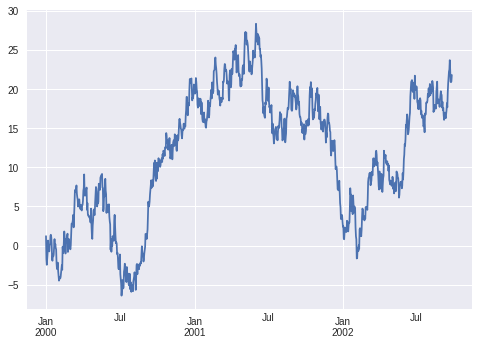

In [9]:
ts.plot();

If the index consists of dates, it calls [gcf().autofmt_xdate()](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate) to try to format the x-axis nicely as per above.  
On <font size = 3 color="blue">*DataFrame*</font>, [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)() is a convenience to plot all of the columns with labels:

In [10]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

df.head()

,A,B,C,D
2000-01-01,0.431665,1.339444,-1.301131,-0.996566
2000-01-02,0.830124,1.772018,-1.249081,-0.233280
2000-01-03,1.681126,1.061226,-1.994729,0.566884
2000-01-04,1.795040,1.169771,-1.844147,1.591704
2000-01-05,1.596994,1.032209,-2.593992,3.212506


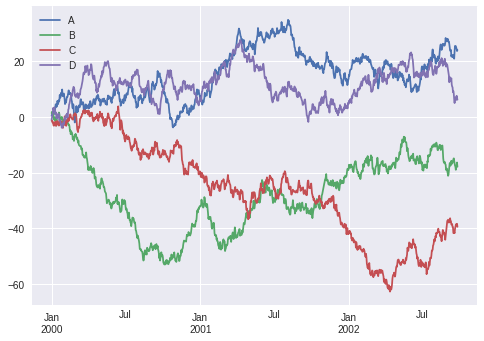

In [12]:
plt.figure();
df.plot();

You can plot one column versus another using the x and y keywords in [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)():

In [13]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

df3.head()

,B,C,A
0,1.756998,-1.886223,0
1,1.463856,-2.691928,1
2,2.643380,-2.044704,2
3,3.403378,-2.187519,3
4,3.671572,-2.700021,4


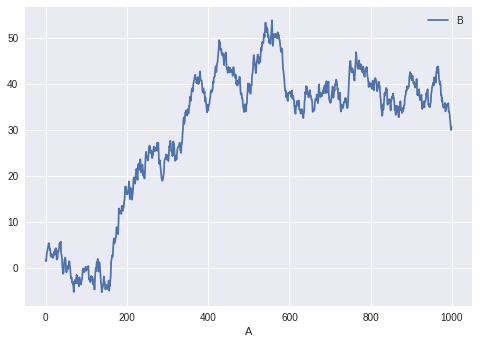

In [15]:
df3.plot(x='A', y='B');

Note For more formatting and styling options, see [formatting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-formatting).

# Other Plots

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)(), and include:

‘<font size = 3 color="blue">*bar*</font>’ or ‘<font size = 3 color="blue">*barh*</font>’’ for bar plots  
‘<font size = 3 color="blue">*hist*</font>’’ for histogram  
‘<font size = 3 color="blue">*box*</font>’’ for boxplot  
‘<font size = 3 color="blue">*kde*</font>’’ or ‘<font size = 3 color="blue">*density*</font>’’ for density plots  
‘<font size = 3 color="blue">*area*</font>’’ for area plots  
‘<font size = 3 color="blue">*scatter*</font>’’ for scatter plots  
‘<font size = 3 color="blue">*hexbin*</font>’’ for hexagonal bin plots  
‘<font size = 3 color="blue">*pie*</font>’’ for pie plots  

**Note**  
<font size = 3 color="blue">*df.plot(kind='line')*</font> `` is equivalent to `` <font size = 3 color="blue">*df.plot.line()*</font>

And, there are several plotting functions in pandas.plotting that take a Series or DataFrame as an argument. These include:

Scatter Matrix  
Andrews Curves  
Parallel Coordinates  
Lag Plot  
Autocorrelation Plot  
Bootstrap Plot  
RadViz  
Plots may also be adorned with errorbars or tables.

## Bar plots

In [0]:
#Bar plots

## Histograms

In [16]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1},   columns=['a', 'b', 'c'])

df4.head()

,a,b,c
0,0.395716,1.748409,-0.883860
1,1.355015,0.167204,-1.351449
2,0.942452,0.536967,-1.884274
3,1.530013,-1.018608,-1.191474
4,2.282026,-0.801392,-3.004015


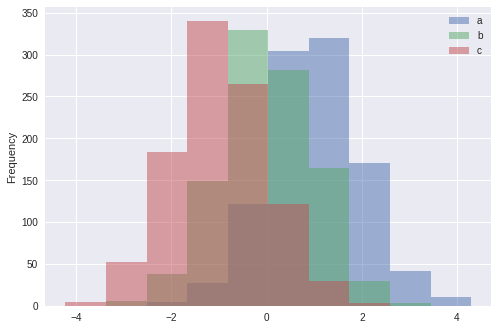

In [17]:
plt.figure();
df4.plot.hist(alpha=0.5);

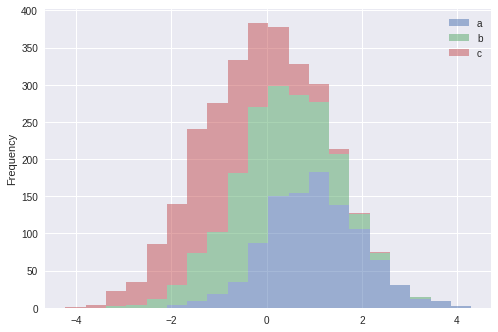

In [30]:
plt.figure();
df4.plot(kind='hist',stacked=True, bins=20, alpha=0.5);

## Box Plots

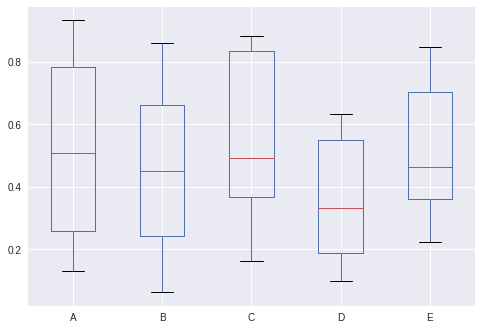

In [28]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
plt.figure()
df.plot.box();

## Area Plot

In [0]:
#

## Scatter Plot

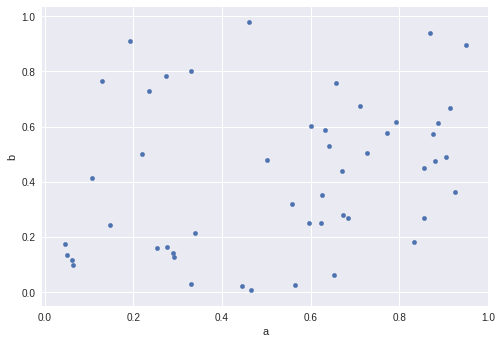

In [26]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

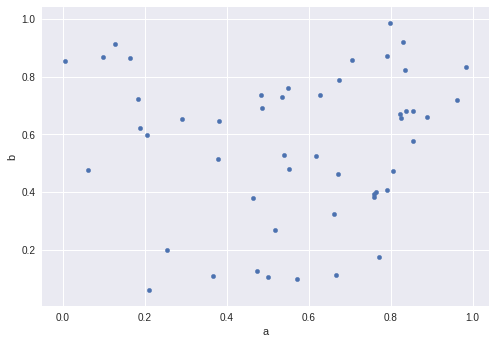

In [27]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot(x='a', y='b',kind='scatter');

# Plotting Tools

## Scatter Matrix Plot

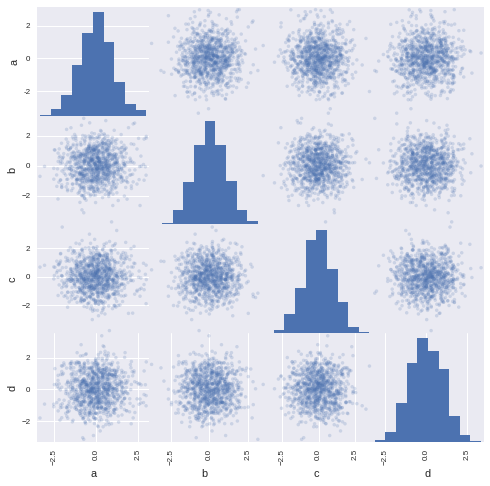

In [40]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

plt.figure()
scatter_matrix(df, alpha=0.2, figsize=(8, 8));